#### Домашнее задание №1: Расчёт метрик математической статистики
Cгенерируйте 1000 значений в диапазоне от 5 до 105 методом random() и сохраните их в структуру pandas.Series(). Какой вид имеет распределение и почему именно такой? Что нужно сделать, чтобы распределение изменило форму?
Постройте гистограмму при помощи matplotlib. Рассчитайте основные статистические метрики для выборки вручную и в python (подсказка: полезно будет рассчитать частоту, с которой встречаются значения).
Проведите аналогичные расчёты при помощи встроенных методов класса pandas.Series().
Результат работы пришлите в формате IPython Jupyter Notebook.

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
np.random.seed(23)

<AxesSubplot:ylabel='Frequency'>

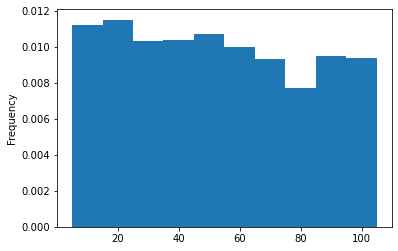

In [10]:
sample = pd.Series(np.random.random(1000) * 100 + 5)
sample.plot.hist(density=True)

  Распределение имеет вид, близкий к равномерному, потому то метод random() генерирует числа из равномерного распределения.  
  При увеличении кол-ва чисел распределение приближается к равномерному.


<AxesSubplot:ylabel='Frequency'>

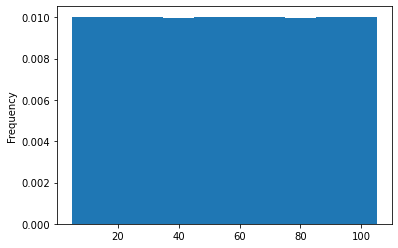

In [6]:
large_sample = pd.Series(np.random.random(1000000) * 100 + 5)
large_sample.plot.hist(density=True)

Чтобы распределение изменило форму, можно генерировать числа из других распределений:  
#### Распределение Пуассона

<AxesSubplot:ylabel='Frequency'>

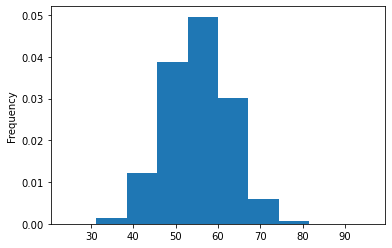

In [7]:
poisson_sample = pd.Series(np.random.poisson(55, 1000))
poisson_sample.plot.hist(density=True)

#### Нормальное распределение:

<AxesSubplot:ylabel='Frequency'>

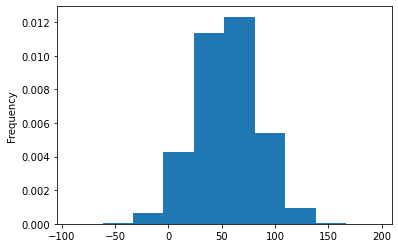

In [8]:
normal_sample = pd.Series(np.random.normal(55, (105 - 5) / np.sqrt(12), size=1000))
normal_sample.plot.hist(density=True)

#### Гистограмма с помощью matplotlib

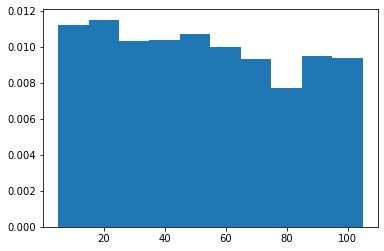

In [7]:
plt.hist(sample, bins=10, density=True)
plt.show()

#### Расчет статистических метрик

In [11]:
# Среднее
hm_mean = sum(sample.values) / sample.size
a_mean = sample.mean()

# Несмещенная оценка Дисперсии
hm_dis = sum((sample.values - hm_mean)**2) / (sample.size - 1)
a_dis = sample.std()

# Среднеквадратичное отклонение
hm_std = np.sqrt(hm_dis)
a_std = np.sqrt(a_dis)

# Стандратная ошибка среднего
hm_se = np.sqrt(hm_dis) / np.sqrt(sample.size)
a_se = np.sqrt(a_dis) / np.sqrt(sample.size)

# Частота
hm_frequencies = dict()
for value in sample.values:
  hm_frequencies[value] = hm_frequencies.get(value, 0)
  hm_frequencies[value] += 1
a_frequencies = sample.value_counts()

In [20]:
print(f'{hm_mean=}, {a_mean=}')
print(f'{hm_dis=}, {a_dis=}')
print(f'{hm_std=}, {a_std=}')
print(f'{hm_se=}, {a_se=}')
dict(a_frequencies) == hm_frequencies

hm_mean=52.62711728269477, a_mean=52.62711728269477
hm_dis=834.7588014259513, a_dis=28.89219274174169
hm_std=28.89219274174169, a_std=5.375145834462698
hm_se=0.9136513566048875, a_se=0.1699770359246851


True

In [9]:
 sample.quantile()
 sample.median()
 sample.value_counts(bins=10, normalize=True)

(15.035, 25.016]    0.115
(4.952, 15.035]     0.112
(44.98, 54.962]     0.107
(34.998, 44.98]     0.104
(25.016, 34.998]    0.103
(54.962, 64.943]    0.100
(84.907, 94.889]    0.095
(94.889, 104.87]    0.094
(64.943, 74.925]    0.093
(74.925, 84.907]    0.077
dtype: float64